In [13]:
from abc import ABC, abstractmethod
import random
import numpy as np
import matplotlib.pyplot as plt


def generate_data(n=100):
    result = random.choices([0, 1], weights=[0.1, 0.9], k=n)
    result = np.array(result, dtype=float)
    result[result == 0] = np.random.normal(10, 1, len(result[result == 0]))
    result[result == 1] = np.random.normal(5, 1, len(result[result == 1]))
    return result

In [14]:
class kde:
    __slots__ = ["kernel_type", "bandwidth", "data", "n"]

    def __init__(self, kernel_type="gaussian", bandwidth=1):
        self.kernel_type = kernel_type
        self.bandwidth = bandwidth

    def fit(self, data):
        self.data = data
        self.n = len(data)

    @abstractmethod
    def gaussian_kernel(self, x, mean, std):
        return np.exp(-0.5 * ((x - mean) / std) ** 2) / (std * np.sqrt(2 * np.pi))

    def transform(self, x):
        solution = np.zeros(len(x))
        for data_point in self.data:
            if self.kernel_type == "gaussian":
                solution += self.gaussian_kernel(x, mean=data_point, std=self.bandwidth)
        return solution / (self.n * self.bandwidth)

In [15]:
kd = kde()

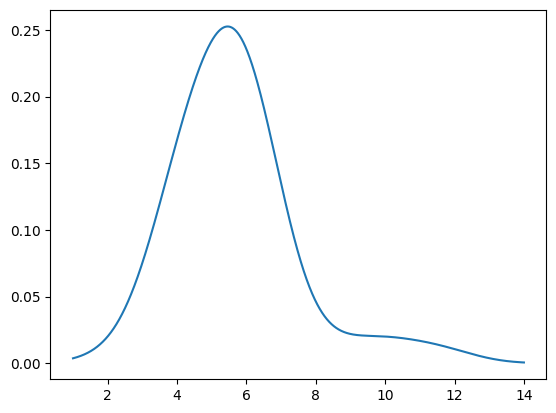

In [16]:
data = generate_data(100)

kd.fit(data)
plt.plot(np.linspace(1, 14, 5000), kd.transform(np.linspace(1, 14, 5000)))